In [13]:
%matplotlib inline


In [15]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)

(400, 4096)


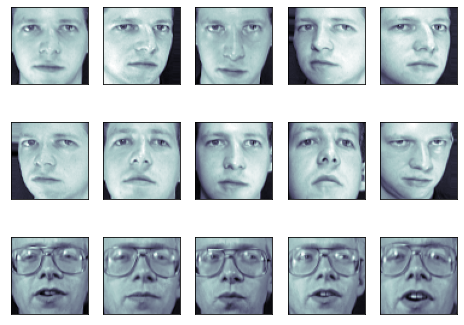

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)


(300, 4096) (100, 4096)


In [18]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

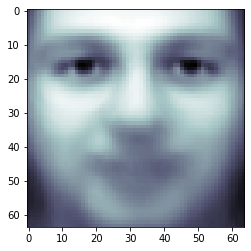

In [19]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
cmap=plt.cm.bone)


In [20]:
print(pca.components_.shape)

(150, 4096)


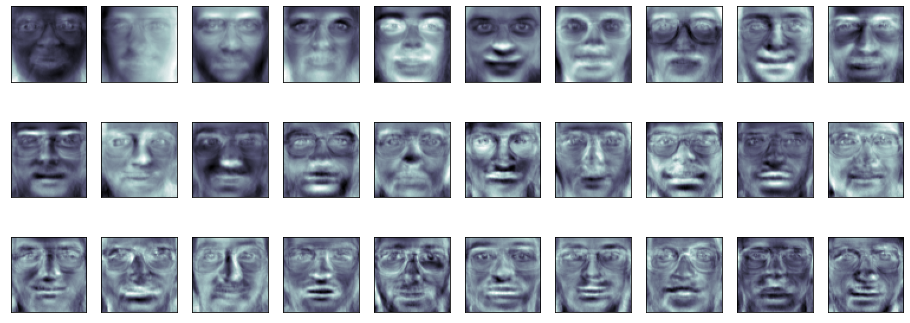

In [21]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [22]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)


GaussianNB()

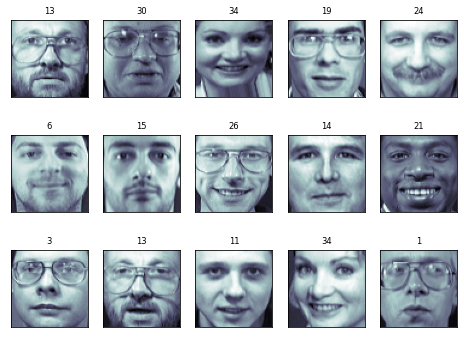

In [24]:
import numpy as np

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)


In [26]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2
           3       0.10      1.00      0.18         1
           4       1.00      1.00      1.00         1
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall 

In [27]:
print(metrics.confusion_matrix(y_test, y_pred))


[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.78
precision: [1.   1.   0.5  0.1  1.   1.   1.   1.   0.25 1.   0.5  0.5  1.   1.
 0.75 0.   0.   0.   0.8  1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.75 0.5  1.   1.   1.   1.  ]
recall: [0.16666667 0.75       0.5        1.         1.         0.2
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         0.         0.         0.
 1.         1.         1.         1.         1.         1.
 0.5        0.5        1.         1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.        ]


C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
